In [ ]:
import pickle
import numpy as np
from tqdm.auto import tqdm
from google.colab import drive
import matplotlib.pyplot as plt

# pytorch for neural network
import torch
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary

torch.manual_seed(0)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [ ]:
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Thesis/WorkSpace

Mounted at /content/drive
/content/drive/MyDrive/Thesis/WorkSpace


In [ ]:
from modules import data_f, network_f, network_architectures, preprocess_f

In [ ]:
fname = data_f.download_file('https://uni-siegen.sciebo.de/s/HGdUkoNlW1Ub0Gx/download', save_path='/content/')

downloading file from https://uni-siegen.sciebo.de/s/HGdUkoNlW1Ub0Gx/download
to /content/


  0%|          | 0.00/2.25G [00:00<?, ?iB/s]

file downloaded


In [ ]:
data_f.extract_zip(f'/content/{fname}')

extracting /content/WESAD.zip to /content


Extracting :   0%|          | 0/92 [00:00<?, ?it/s]

folder extracted from zip


In [ ]:
with (open("/content/WESAD/S3/S3.pkl", "rb")) as openfile:
    data = pickle.load(openfile, encoding='latin1')

signal = data['signal']
labels = data['label'].astype('int')
subject = data['subject']

[0 1 2 3 4 5 6 7]
ACC (4545100, 3)
ECG (4545100, 1)
EMG (4545100, 1)
EDA (4545100, 1)
Temp (4545100, 1)
Resp (4545100, 1)


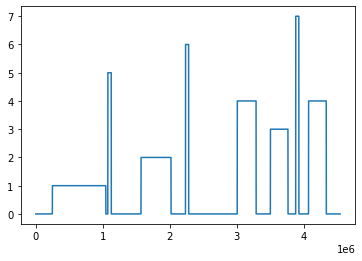

In [ ]:
print(np.unique(labels))
for k,v in signal['chest'].items():
  print(k,v.shape)

plt.plot(labels)

In [ ]:
inputs = np.hstack([vals for vals in signal['chest'].values()])
print(inputs.shape)
print(np.unique(labels))

preprocess_f.normalize(inputs.swapaxes(0,1)[None,:])

(4545100, 8)
[0 1 2 3 4 5 6 7]


### create dataloader

In [ ]:
dataloaders = data_f.create_trainValLoaders(inputs, labels, batch_size=1000)

### define the network

view network summary

In [ ]:
model = network_architectures.Linear_Classifier(num_classes=8, inp_dim=8)
model = model.to(device)

summary(model, (1,8))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 16]             144
              ReLU-2                [-1, 1, 16]               0
            Linear-3                [-1, 1, 32]             544
              ReLU-4                [-1, 1, 32]               0
            Linear-5                [-1, 1, 16]             528
              ReLU-6                [-1, 1, 16]               0
            Linear-7                 [-1, 1, 8]             136
Total params: 1,352
Trainable params: 1,352
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.01
Estimated Total Size (MB): 0.01
----------------------------------------------------------------


set criterion and optimizer

In [ ]:
# Define a Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train the network

training network


  0%|          | 0/60 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

epoch: 6  | train loss: 0.236, val loss: 0.232  | avg train loss: 0.344, avg val loss: 0.280


train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

epoch: 12  | train loss: 0.212, val loss: 0.209  | avg train loss: 0.220, avg val loss: 0.217


train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

epoch: 18  | train loss: 0.192, val loss: 0.189  | avg train loss: 0.199, avg val loss: 0.197


train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

epoch: 24  | train loss: 0.184, val loss: 0.181  | avg train loss: 0.187, avg val loss: 0.185


train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

epoch: 30  | train loss: 0.179, val loss: 0.187  | avg train loss: 0.181, avg val loss: 0.183


train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

epoch: 36  | train loss: 0.175, val loss: 0.176  | avg train loss: 0.177, avg val loss: 0.177


train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

epoch: 42  | train loss: 0.170, val loss: 0.167  | avg train loss: 0.172, avg val loss: 0.171


train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

epoch: 48  | train loss: 0.166, val loss: 0.168  | avg train loss: 0.168, avg val loss: 0.168


train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

epoch: 54  | train loss: 0.162, val loss: 0.163  | avg train loss: 0.164, avg val loss: 0.163


train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

train:   0%|          | 0/3409 [00:00<?, ?it/s]

val:   0%|          | 0/1137 [00:00<?, ?it/s]

epoch: 60  | train loss: 0.157, val loss: 0.152  | avg train loss: 0.160, avg val loss: 0.156
Finished Training


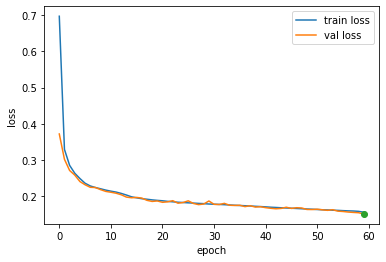

In [ ]:
model.apply(network_f.weight_reset)
optimizer = optim.Adam(model.parameters(), lr=0.001)

best_params = network_f.trainNet(model, criterion, optimizer, dataloaders, epochs=60)

In [ ]:
model.load_state_dict(best_params)

<All keys matched successfully>

### evaluate

In [ ]:
print("evaluation results on train data")
loader = data_f.createLoader(inputs, labels, batch_size=1000)
print(network_f.evaluate(model, loader))

evaluation results on train data
              precision    recall  f1-score   support

           0     0.9591    0.9555    0.9573   2345699
           1     0.9901    0.9879    0.9890    798000
           2     0.8684    0.8109    0.8387    448000
           3     0.8063    0.8451    0.8252    262500
           4     0.9456    0.9853    0.9650    546001
           5     0.8641    0.9216    0.8919     51100
           6     0.8849    0.9338    0.9087     46900
           7     0.9630    0.9368    0.9498     46900

    accuracy                         0.9433   4545100
   macro avg     0.9102    0.9221    0.9157   4545100
weighted avg     0.9434    0.9433    0.9432   4545100

